<a href="https://colab.research.google.com/github/ShawnASC5/National-Parks-Services/blob/main/NationalParksData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Shawn Gibson

**Purpose: interpret data from the National Parks Service about endangered species in different parks. Along with analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, I will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.**

Firstly, I'm going to load in packages I'll use later on in this project, I'll use things such as matplotlib, pandas, and seaborn to do analysis and to visually see the data later on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


df_species = pd.read_csv("species_info.csv")

df_observations = pd.read_csv("observations.csv")


# Use groupby to analyze the distribution of conservation_status
conservation_distribution_grouped = df_species.groupby('conservation_status').count()

# Display the grouped distribution
conservation_distribution_grouped



,category,scientific_name,common_names
conservation_status,,,
Endangered,16,16,16
In Recovery,4,4,4
Species of Concern,161,161,161
Threatened,10,10,10


After visualizing the conservation status into a barplot using seaborn, it's shown that the number of the "Species of Concern" is a lot higher than the rest of the statuses. I split the "conservation_status" column in df_species into seperate categories to achieve this visual result. It seems like "In recovery" is quite rare compared to the rest of the categories, which is interesting.


<ipython-input-2-11082c784c5e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conservation_counts, x='conservation_status', y='count', palette='viridis')


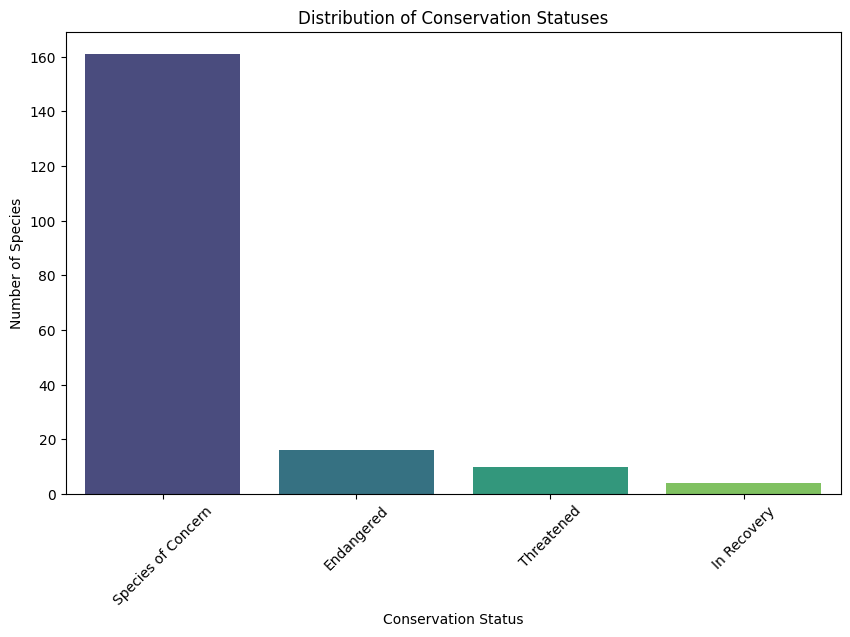

In [2]:
# Group by conservation_status and count species
conservation_counts = df_species['conservation_status'].value_counts().reset_index()
conservation_counts.columns = ['conservation_status', 'count']

# Plot the distribution of conservation statuses
plt.figure(figsize=(10, 6))
sns.barplot(data=conservation_counts, x='conservation_status', y='count', palette='viridis')
plt.title("Distribution of Conservation Statuses")
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



For the next visualization, I'm going to utilize a correlation matrix, which shows the pairwise correlations between all numerical columns in the DataFrame, I had to drop "scientific_name" and "common_names" as they weren't necessary and would make the chart look sloppy. I then got rid of all categorical data by using one-hot-encoding to turn it into numerical data. With the chart being made, I can infer a few things:

- As seen in the matrix, Fish and Mammals are the most close to 1(Fish: 0.17, Mammals: 0.18), meaning that they are more likely to be endangered than the rest as they are more associated with that category. They could be more likely to be endangered for a multitude of reasons. For example, it can be because they are hunted more frequently than other types of animals.  

- As shown in the matrix, Birds and Plants are the most negatively correlated to endangered, as they are closer to -1 (Birds: -0.1, Plants:-0.13), this means that they are less likely to be endangered than the rest. This could be for the opposite reason as described earlier, as there aren't many "hunters" for birds, and plants aren't necessarily "hunted" either.

- As shown in the matrix, Fish are more likely to be threatened than other categories(0.35). This could be because fish are a source of food for a lot of different animals, even us as humans.

- As shown in the matrix, Birds are more likely to be a species of concern(-0.16), while fish are less likely to be a species of concern(-0.33), as birds are more associated with that category, and fish are less associated with that category. This could be because birds are more at risk of habitat destruction, especially from us humans. Fish are at risk too, but more reasearch is required before making a hypothesis about how they are less likely to be a species of concern.

**Summary of Insights:**
Fish and Mammals are more likely to be classified as "Endangered" or "Threatened," potentially due to higher hunting pressures and their role as food sources.
Birds are most associated with "Species of Concern," likely due to risks of habitat destruction.
Plants and Birds are less likely to be classified as "Endangered," potentially because they are less targeted by hunting or exploitation.
Fish are the least likely to be classified as "Species of Concern," possibly because conservation efforts and awareness around water pollution have been improving.

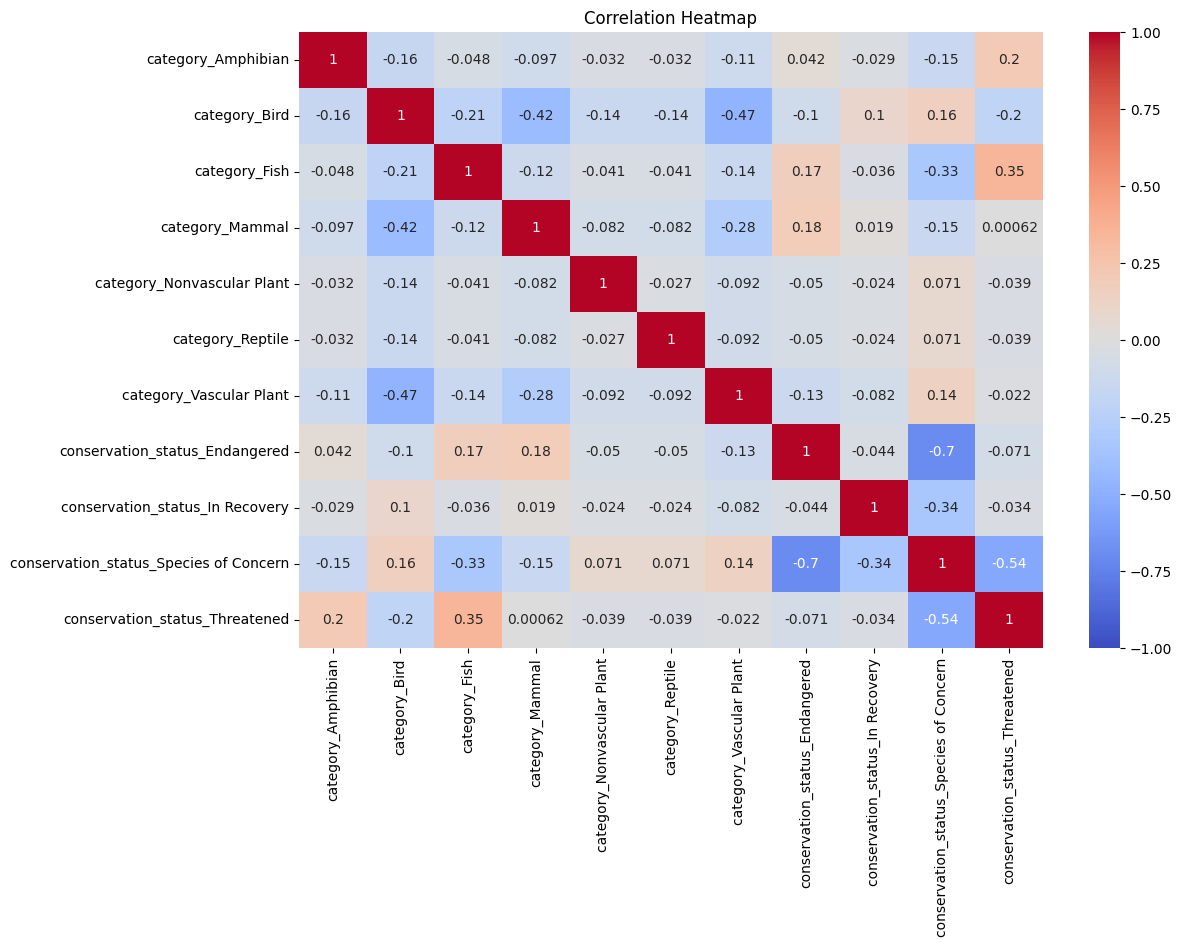

In [3]:
# Going to drop the name columns for this data, as they are not needed to analyze the correlation
df_species_cleaned = df_species.dropna()  # Drop rows with NaN values
# df_species['conservation_status'].fillna('No Status', inplace=True)
df_species_numeric = df_species_cleaned.drop(columns=['scientific_name', 'common_names'])

# Encode categorical columns using one-hot encoding
df_species_encoded = pd.get_dummies(df_species_numeric, columns=['category', 'conservation_status'])

# Compute the correlation matrix
correlation_matrix = df_species_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cbar=True, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()


After putting this data into a matrix, I started building predictive models to predict whether a species is endangered based on other categories. I'm going to first start by utilizing a Logistic Regression, then I'm going to follow up by using Random Forest and compare the results.  

In [4]:
from sklearn.model_selection import train_test_split


X = df_species_encoded.drop(columns='conservation_status_Endangered')
y = df_species_encoded['conservation_status_Endangered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

My models initially had high scores, indicating that my models are being overfit with data, and it's only good for running test data. I fix that promptly.


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.1)
lr_model.fit(X_train, y_train)
lr_y_train_pred = lr_model.predict(X_train)
lr_y_test_pred = lr_model.predict(X_test)

print(f"Train acc: {round(accuracy_score(y_train, lr_y_train_pred), 3)}")
print(f"Test acc: {round(accuracy_score(y_test, lr_y_test_pred), 3)}")


Train acc: 0.921
Test acc: 0.949


Here I'm using the Random Forest model, after which I rank each values in order of importance to check to see if I can remove or find the best combination of values to get a better and more reasonable accuracy.

From the scores I'm being presented with I can infer:

- "conservation_status_Species of Concern" is the most important value out of the values in the value list

- The bottom tier values in the ranked list may tell me that they may not be needed, more hyperparameter tuning is needed.


In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=3, min_samples_split=10, min_samples_leaf=5)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, rf_y_pred):.2f}")

from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Mean CV Accuracy: {rf_cv_scores.mean():.2f}")

#Feature Importance: Higher values mean that a feature plays a more significant role in determining the output.
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False).head(10))


Random Forest Test Accuracy: 0.92
Random Forest Cross-Validation Scores: [0.8974359  0.92105263 0.89473684 0.92105263 0.92105263]
Random Forest Mean CV Accuracy: 0.91
                                  Feature  Importance
8  conservation_status_Species of Concern    0.538292
3                         category_Mammal    0.147601
6                 category_Vascular Plant    0.084295
1                           category_Bird    0.079623
9          conservation_status_Threatened    0.072037
0                      category_Amphibian    0.059787
4              category_Nonvascular Plant    0.010526
2                           category_Fish    0.007839
5                        category_Reptile    0.000000
7         conservation_status_In Recovery    0.000000


After removing unnessary columns, I got a higher accuracy (0.95) instead of the last test, removing "category_Reptile" and "conservation_status_In Recovery" has reduced the noise in my model by making it focus on the important values in the dataset. This also tells us that the values in the dataset with no importance are uninformative!

In [7]:
# Remove 'category_Reptile' and 'conservation_status_In Recovery'
columns_to_drop = ['category_Reptile', 'conservation_status_In Recovery']

# Drop the columns from the feature datasets
X_train_reduced = X_train.drop(columns=columns_to_drop)
X_test_reduced = X_test.drop(columns=columns_to_drop)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest with tuned hyperparameters
rf_model_reduced = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=3)

# Fit the model on reduced features
rf_model_reduced.fit(X_train_reduced, y_train)

# Predict on the test set
rf_y_pred_reduced = rf_model_reduced.predict(X_test_reduced)

# Evaluate accuracy
print(f"Random Forest Test Accuracy (Reduced Features): {accuracy_score(y_test, rf_y_pred_reduced):.2f}")



Random Forest Test Accuracy (Reduced Features): 0.95


Here, I'm using a confusion matrix to test my Random Forest Model to see if it is actually good at classifying the conservation status of a species. The confusion matrix for the Random Forest model highlights its strong ability to identify endangered species. Notably, the model achieved perfect recall (no false negatives), which is crucial for conservation efforts as missing endangered species can have severe consequences. It also demonstrates high precision, with only 2 false positives among the predictions. This balance ensures that the model performs well in identifying at-risk species while minimizing incorrect classifications.




Accuracy: 0.95
Precision: 0.60
Recall: 1.00
F1 Score: 0.75


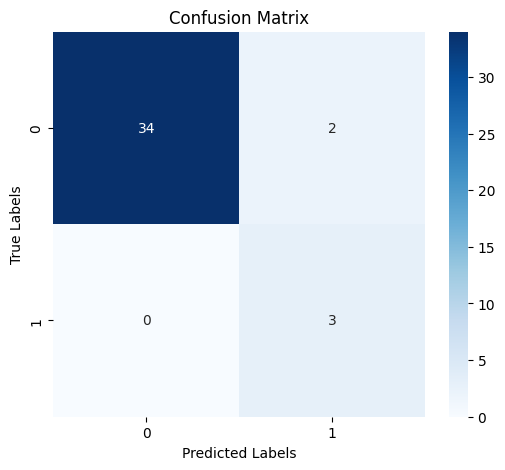

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions using the Logistic Regression model
y_pred = lr_model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


At this point, I'm now performing a Chi-Square Test for Independence to determine if there is a significant relationship between the category of a species (e.g., Mammal, Bird, Fish) and its conservation_status (e.g., Endangered, Threatened).

The test outputs a Chi-Square statistic of 628.58 and a p-value of 2.45 × 10⁻¹¹⁷, which is far below the significance threshold of 0.05. This means that the relationship between species category and conservation status is statistically significant.

In other words, certain species categories are more likely to be associated with specific conservation statuses than others, and this difference is unlikely to be due to chance.

In [9]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_species['category'], df_species['conservation_status'].fillna('No Status'))

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("Conclusion: There is a significant relationship between species category and conservation status.")
else:
    print("Conclusion: There is no significant relationship between species category and conservation status.")



Chi-Square Statistic: 628.581965798279
P-Value: 2.4551423165990194e-117
Degrees of Freedom: 24
Conclusion: There is a significant relationship between species category and conservation status.


With this next bit of code, I'm doing another corrleation matrix to show the distribution of conservation status by the species category. As we can see here, before getting into anything else, Vascular plants seem to dominate the "No Status" section. Implying that this influences the patterns and overall distributions.

This matrix also shows that Mammals are the most endangered out of all the other species, and Reptile's and Nonvascular plants aren't in danger of being endangered.

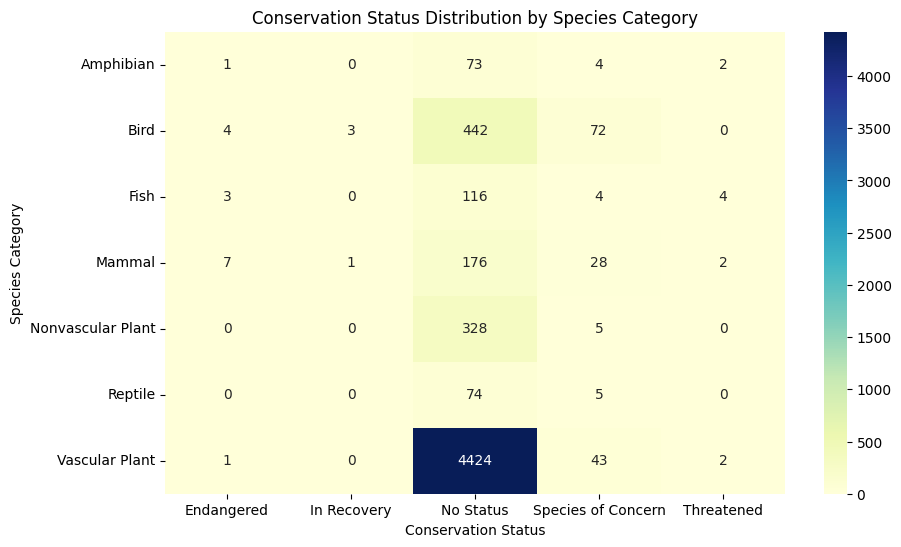

In [10]:

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Conservation Status Distribution by Species Category")
plt.xlabel("Conservation Status")
plt.ylabel("Species Category")
plt.show()


In this step, I normalized the contingency table to calculate the proportions of conservation statuses within each species category. This approach helps reveal the relative risks faced by smaller categories, like Mammals and Birds, which might otherwise be obscured by the dominance of Vascular Plants in the dataset. For example, while Mammals make up only a fraction of the dataset, they show higher proportions in 'Endangered' (3%) and 'Species of Concern' (13%) statuses compared to other categories.


Now, to use these insights as a summary on how each species category and each conservation status are related:

- Mammals and Fish are more likely to fall under higher-risk statuses, leading the contingency table in the 'Endangered' category compared to other categories. These groups require close monitoring to mitigate extinction risks.

- Birds dominate the 'Species of Concern' category, suggesting they face significant pressures that could escalate into higher-risk statuses over time. Notably, they already share a small proportion in the 'Endangered' category

- Fish and Amphibians show the highest proportions in the 'Threatened' category, highlighting their vulnerability to future conservation risks. Factors like habitat loss and pollution may contribute to their elevated risk.

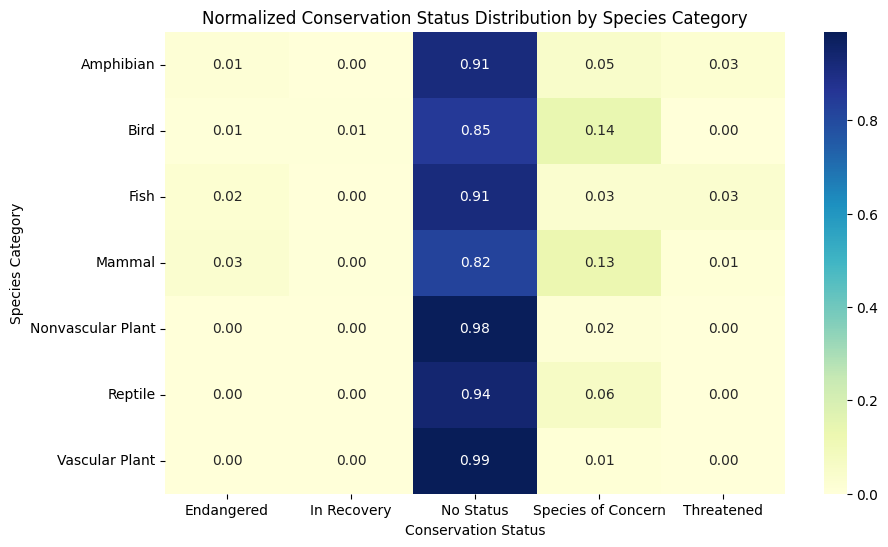

In [13]:
# Normalize the contingency table
normalized_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Visualize the normalized data
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Normalized Conservation Status Distribution by Species Category")
plt.xlabel("Conservation Status")
plt.ylabel("Species Category")
plt.show()


Finally, we address the question of which species were spotted the most at each park by merging the observations.csv and species_info.csv datasets. After visualizing the data, we find:

- Columba livia (common pigeons) are the most spotted species at Bryce National Park, likely due to their adaptability and widespread presence.

- Streptopelia decaocto (Eurasian collared dove) dominates observations in the Great Smoky Mountains National Park, a species known for its ability to thrive in both urban and natural settings.

- Holcus lanatus (Yorkshire fog/velvet grass) is the most observed species in Yellowstone National Park, which may reflect its abundance as a widespread grass species.

- Hypochaeris radicata (false dandelion or hairy cat's ear) is the most spotted species in Yosemite National Park, a hardy plant that thrives in various environments.


These findings may reflect not only the abundance of these species but also their ease of observation.

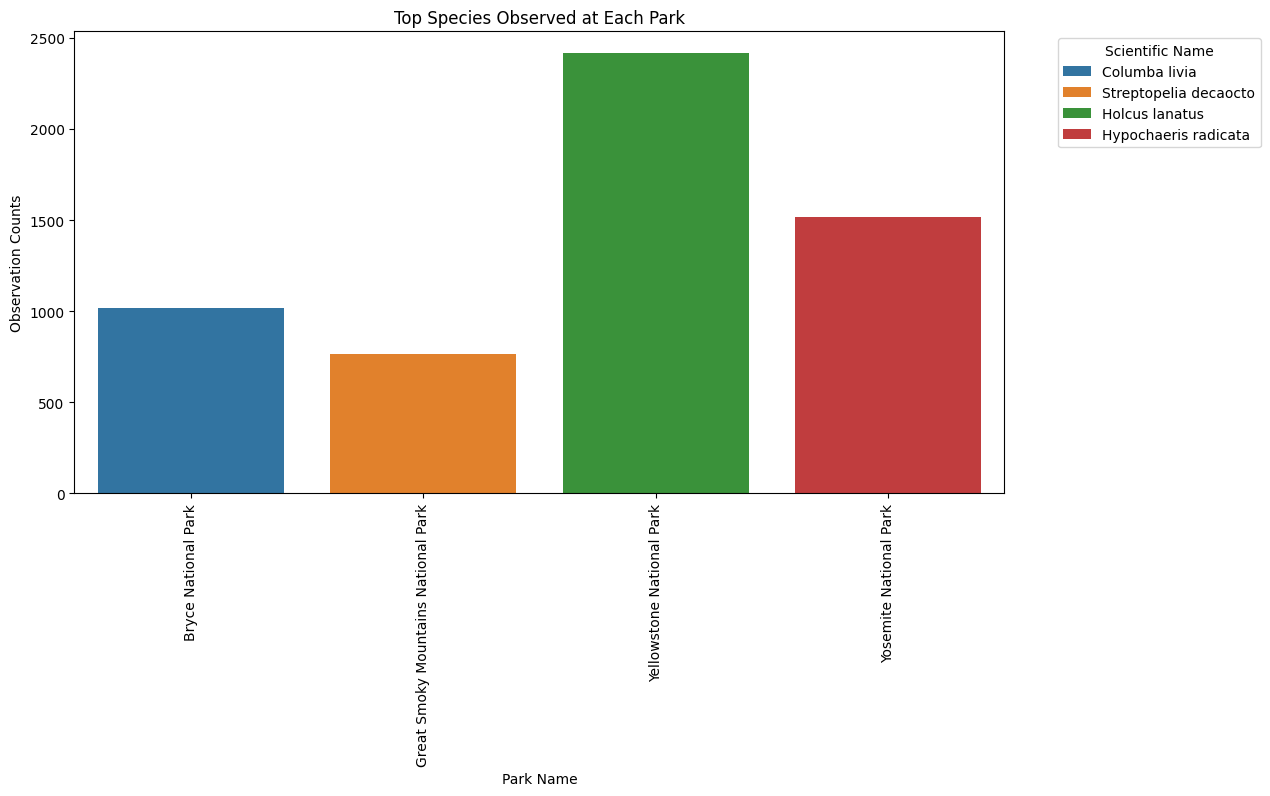

In [15]:
# Merge species and observations data
merged_data = pd.merge(df_observations, df_species, on='scientific_name')

# Group by park_name and scientific_name, summing up observations
park_species_counts = merged_data.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()

# Find the species with the highest observations for each park
top_species_per_park = park_species_counts.loc[park_species_counts.groupby('park_name')['observations'].idxmax()]

# Display results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_species_per_park, x='park_name', y='observations', hue='scientific_name')
plt.xticks(rotation=90)
plt.title("Top Species Observed at Each Park")
plt.ylabel("Observation Counts")
plt.xlabel("Park Name")
plt.legend(title="Scientific Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
